In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def gradient_descent(func, grad_func, start_point, learning_rate=0.1, 
                     max_iters=100, tolerance=1e-6, verbose=True):
    """
    Implement Gradient Descent to find local minima of a function
    
    Parameters:
    - func: The function to minimize
    - grad_func: Gradient (derivative) of the function
    - start_point: Starting point for the algorithm
    - learning_rate: Step size (alpha)
    - max_iters: Maximum number of iterations
    - tolerance: Convergence threshold
    - verbose: Print iteration details
    
    Returns:
    - minimum: Point where local minimum is found
    - path: List of all points visited during descent
    """
    x = start_point
    path = [x]
    func_values = [func(x)]
    
    if verbose:
        print(f"\nStarting Gradient Descent from x = {x}")
        print(f"Learning Rate: {learning_rate}")
        print(f"Max Iterations: {max_iters}")
        print(f"Tolerance: {tolerance}")
        print("\n" + "="*80)
        print(f"{'Iteration':<12} {'x':<20} {'f(x)':<20} {'Gradient':<20}")
        print("="*80)
    
    for i in range(max_iters):
        # Calculate gradient at current point
        gradient = grad_func(x)
        
        # Update x using gradient descent rule: x_new = x - alpha * gradient
        x_new = x - learning_rate * gradient
        
        # Store the path
        path.append(x_new)
        func_values.append(func(x_new))
        
        # Print iteration details
        if verbose and i < 10:
            print(f"{i:<12} {x:<20.6f} {func(x):<20.6f} {gradient:<20.6f}")
        
        # Check for convergence
        if abs(x_new - x) < tolerance:
            if verbose:
                print("="*80)
                print(f"\n✓ Converged after {i+1} iterations!")
            break
        
        x = x_new
    
    return x, path, func_values

In [3]:
# Example 1: f(x) = (x+3)^2
print("\n" + "="*80)
print("EXAMPLE 1: Finding minimum of f(x) = (x+3)²")
print("="*80)

def func1(x):
    """Function: f(x) = (x+3)²"""
    return (x + 3) ** 2

def grad_func1(x):
    """Gradient: f'(x) = 2(x+3)"""
    return 2 * (x + 3)

start_point = -2
minimum1, path1, func_values1 = gradient_descent(func1, grad_func1, start_point, 
                                                  learning_rate=0.1, max_iters=100)

print(f"\nLocal minimum found at: x = {minimum1:.6f}")
print(f"Function value at minimum: f({minimum1:.6f}) = {func1(minimum1):.6f}")
print(f"Expected minimum: x = -3, f(x) = 0")


EXAMPLE 1: Finding minimum of f(x) = (x+3)²

Starting Gradient Descent from x = -2
Learning Rate: 0.1
Max Iterations: 100
Tolerance: 1e-06

Iteration    x                    f(x)                 Gradient            
0            -2.000000            1.000000             2.000000            
1            -2.200000            0.640000             1.600000            
2            -2.360000            0.409600             1.280000            
3            -2.488000            0.262144             1.024000            
4            -2.590400            0.167772             0.819200            
5            -2.672320            0.107374             0.655360            
6            -2.737856            0.068719             0.524288            
7            -2.790285            0.043980             0.419430            
8            -2.832228            0.028147             0.335544            
9            -2.865782            0.018014             0.268435            

✓ Converged after 56 i

In [4]:
# Example 2: f(x) = x² - 4x + 4 = (x-2)²
print("\n\n" + "="*80)
print("EXAMPLE 2: Finding minimum of f(x) = x² - 4x + 4")
print("="*80)

def func2(x):
    """Function: f(x) = x² - 4x + 4"""
    return x**2 - 4*x + 4

def grad_func2(x):
    """Gradient: f'(x) = 2x - 4"""
    return 2*x - 4

start_point2 = 5
minimum2, path2, func_values2 = gradient_descent(func2, grad_func2, start_point2,
                                                  learning_rate=0.1, max_iters=100)

print(f"\nLocal minimum found at: x = {minimum2:.6f}")
print(f"Function value at minimum: f({minimum2:.6f}) = {func2(minimum2):.6f}")
print(f"Expected minimum: x = 2, f(x) = 0")



EXAMPLE 2: Finding minimum of f(x) = x² - 4x + 4

Starting Gradient Descent from x = 5
Learning Rate: 0.1
Max Iterations: 100
Tolerance: 1e-06

Iteration    x                    f(x)                 Gradient            
0            5.000000             9.000000             6.000000            
1            4.400000             5.760000             4.800000            
2            3.920000             3.686400             3.840000            
3            3.536000             2.359296             3.072000            
4            3.228800             1.509949             2.457600            
5            2.983040             0.966368             1.966080            
6            2.786432             0.618475             1.572864            
7            2.629146             0.395824             1.258291            
8            2.503316             0.253327             1.006633            
9            2.402653             0.162130             0.805306            

✓ Converged after

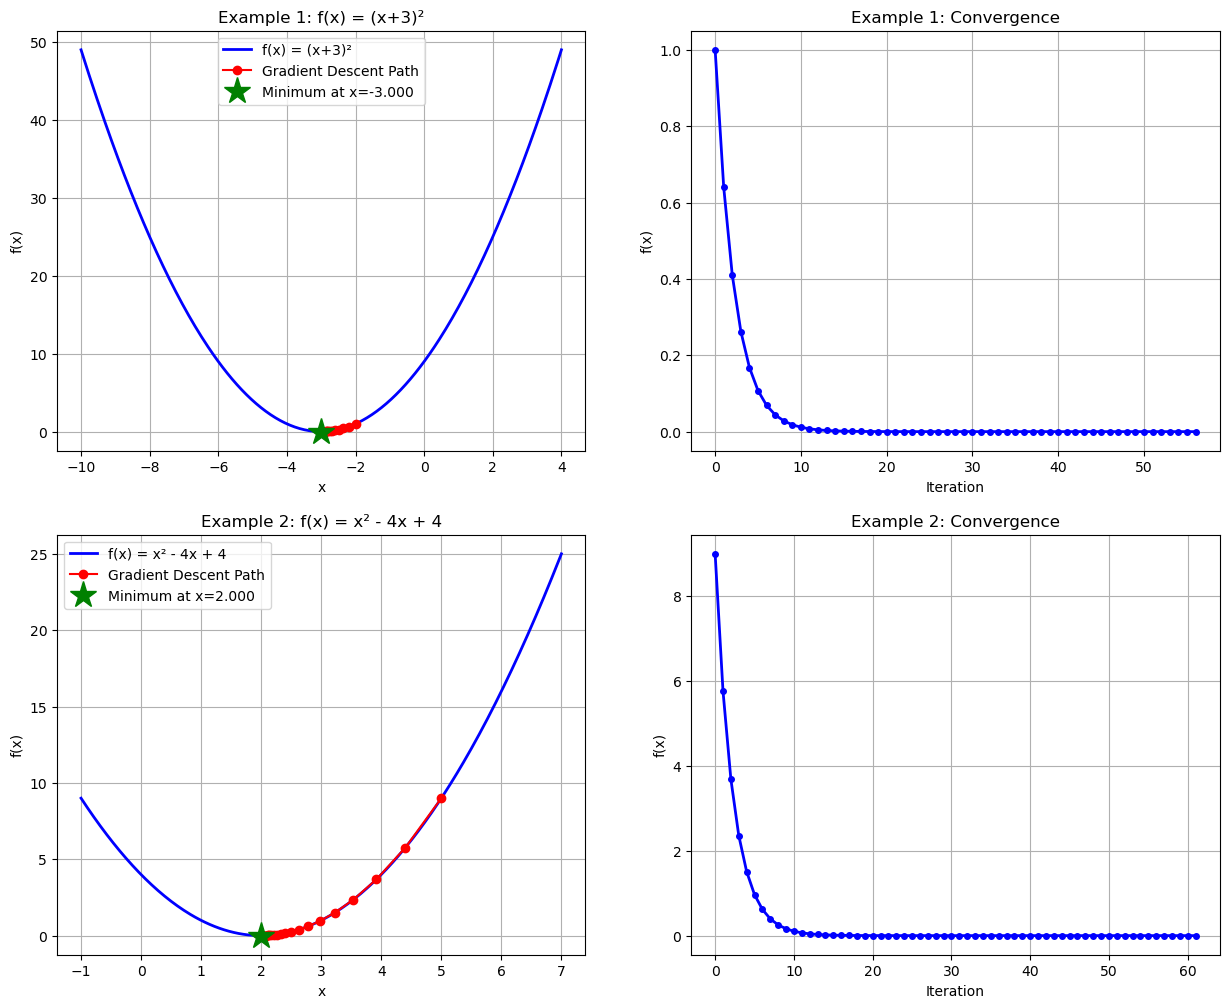

In [6]:
# Visualize Gradient Descent for both examples
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Example 1: Function plot
x_range1 = np.linspace(-10, 4, 300)
y_range1 = func1(x_range1)

axes[0, 0].plot(x_range1, y_range1, 'b-', linewidth=2, label='f(x) = (x+3)²')
axes[0, 0].plot(path1, [func1(x) for x in path1], 'ro-', markersize=6, 
                label='Gradient Descent Path')
axes[0, 0].plot(minimum1, func1(minimum1), 'g*', markersize=20, 
                label=f'Minimum at x={minimum1:.3f}')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].set_title('Example 1: f(x) = (x+3)²')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Example 1: Convergence plot
axes[0, 1].plot(func_values1, 'b-o', linewidth=2, markersize=4)
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].set_title('Example 1: Convergence')
axes[0, 1].grid(True)


# Example 2: Function plot
x_range2 = np.linspace(-1, 7, 300)
y_range2 = func2(x_range2)

axes[1, 0].plot(x_range2, y_range2, 'b-', linewidth=2, label='f(x) = x² - 4x + 4')
axes[1, 0].plot(path2, [func2(x) for x in path2], 'ro-', markersize=6,
                label='Gradient Descent Path')
axes[1, 0].plot(minimum2, func2(minimum2), 'g*', markersize=20,
                label=f'Minimum at x={minimum2:.3f}')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].set_title('Example 2: f(x) = x² - 4x + 4')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Example 2: Convergence plot
axes[1, 1].plot(func_values2, 'b-o', linewidth=2, markersize=4)
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('f(x)')
axes[1, 1].set_title('Example 2: Convergence')
axes[1, 1].grid(True)

In [ ]:
# 1) Gradient Descent — simple intuition and basics
# What is Gradient Descent?

# Gradient Descent (GD) is a method for finding the minimum of a function (usually a loss/error function in machine learning).
# Think of it as walking downhill on a curved surface until you reach the lowest point (the minimum).

# Intuition (very simple)

# Imagine you’re standing on a hill and it’s foggy — you can only see the slope where you stand.

# To get to the bottom, look at which direction the slope goes downwards (the steepest descent) and take a small step that way.

# Repeat: keep taking small steps downhill until the slope is nearly flat — you’re near the bottom.

# Math words made simple

# The direction of steepest ascent is given by the gradient (vector of partial derivatives).

# To go downhill we move in the negative gradient direction.

# Update rule (for parameters 
# 𝜃
# θ):

# 𝜃
# new
# =
# 𝜃
# old
# −
# 𝛼
# ⋅
# ∇
# 𝐽
# (
# 𝜃
# old
# )
# θ
# new
# 	​

# =θ
# old
# 	​

# −α⋅∇J(θ
# old
# 	​

# )

# where:

# ∇
# 𝐽
# (
# 𝜃
# )
# ∇J(θ) is the gradient of the function 
# 𝐽
# J at 
# 𝜃
# θ,

# 𝛼
# α is the learning rate (step size).

# Key parameters and ideas

# Learning rate (
# 𝛼
# α):

# Too small → very slow convergence (takes many steps).

# Too large → you may overshoot the minimum and diverge.

# Convergence:

# We stop when updates become tiny or after a maximum number of iterations.

# Local vs Global minimum:

# For convex functions (like a simple parabola), GD finds the global minimum.

# For non-convex functions, GD may find a local minimum.

# Variants (quick):

# Batch GD: uses whole dataset to compute gradient (used in simple demos).

# Stochastic GD (SGD): uses one sample at a time → noisy but faster per step.

# Mini-batch GD: uses small batches → good tradeoff.

# 2) Basics & theory about the notebook (what it does)

# Your notebook demonstrates gradient descent with simple 1D functions (parabolas). This is a classic educational example: show how gradient descent moves an initial point step-by-step toward the function’s minimum.

# Typical flow in such notebooks:

# Implement a generic gradient descent function that accepts:

# the function f(x),

# its derivative f'(x) (gradient),

# a starting point,

# learning rate and number of iterations.

# Run the gradient descent on simple functions where the minimum is known:

# Example 1: 
# 𝑓
# (
# 𝑥
# )
# =
# (
# 𝑥
# +
# 3
# )
# 2
# f(x)=(x+3)
# 2
#  — minimum at 
# 𝑥
# =
# −
# 3
# x=−3

# Example 2: 
# 𝑓
# (
# 𝑥
# )
# =
# 𝑥
# 2
# −
# 4
# 𝑥
# +
# 4
# =
# (
# 𝑥
# −
# 2
# )
# 2
# f(x)=x
# 2
# −4x+4=(x−2)
# 2
#  — minimum at 
# 𝑥
# =
# 2
# x=2

# Collect the path (values of x visited) and visualize how the algorithm converges.

# Why this is useful:

# It shows how different learning rates and starting points affect convergence.

# Visualizes the update steps and how the point moves toward the minimum.

# 3) Line-by-line explanation of your notebook’s key code cells

# I looked at the 6 code cells. Below I’ll show the important ones (trimmed if long) and explain each line or small block.

# Code cell #0
# import numpy as np


# Explanation

# Imports NumPy, a library for numerical computing in Python. We'll use arrays and math functions.

# Code cell #1 (gradient descent function)
# def gradient_descent(func, grad_func, start_point, learning_rate=0.1, 
#                      max_iters=100, tolerance=1e-6):
#     x = start_point
#     path = [x]
#     for i in range(max_iters):
#         grad = grad_func(x)
#         x_new = x - learning_rate * grad
#         path.append(x_new)
#         if abs(x_new - x) < tolerance:
#             break
#         x = x_new
#     return x, path


# Line-by-line explanation

# def gradient_descent(func, grad_func, start_point, learning_rate=0.1, max_iters=100, tolerance=1e-6):

# Defines a function gradient_descent that performs optimization.

# Parameters:

# func: the function 
# 𝑓
# (
# 𝑥
# )
# f(x) to minimize (not strictly needed for updates, but useful if you want evaluate values).

# grad_func: derivative function 
# 𝑓
# ′
# (
# 𝑥
# )
# f
# ′
# (x).

# start_point: initial guess 
# 𝑥
# 0
# x
# 0
# 	​

# .

# learning_rate: step size 
# 𝛼
# α.

# max_iters: maximum number of update steps.

# tolerance: if the change in x becomes smaller than this, stop early (converged).

# x = start_point

# Initialize current point x to the starting value.

# path = [x]

# Create a list to record the sequence of x values (so we can visualize how the algorithm moves).

# for i in range(max_iters):

# Loop up to max_iters times.

# grad = grad_func(x)

# Compute the derivative (slope) at current point x.

# x_new = x - learning_rate * grad

# The core update rule: move opposite to gradient by scaled amount.

# path.append(x_new)

# Record the new x in the path.

# if abs(x_new - x) < tolerance:

# If the change in x is very small (below tolerance), we assume convergence and break.

# break

# Exit the loop early when converged.

# x = x_new

# Update current point to the new point for next iteration.

# return x, path

# Return the final point and the path of points visited.

# Code cell #2 (Example 1)
# # Example 1: f(x) = (x+3)^2
# def f1(x):
#     return (x + 3)**2

# def df1(x):
#     return 2 * (x + 3)

# start = 10
# root1, path1 = gradient_descent(f1, df1, start_point=start, learning_rate=0.1, max_iters=1000)
# print("Example 1 converged to:", root1)


# Explanation

# f1(x) defines the quadratic function 
# (
# 𝑥
# +
# 3
# )
# 2
# (x+3)
# 2
# .

# df1(x) is derivative 
# 2
# (
# 𝑥
# +
# 3
# )
# 2(x+3).

# start = 10 sets initial guess at 
# 𝑥
# 0
# =
# 10
# x
# 0
# 	​

# =10.

# root1, path1 = gradient_descent(...) runs gradient descent with learning rate 0.1 and up to 1000 iterations, returning final point and the path.

# print(...) prints the converged value. For this convex parabola we expect root1 ≈ -3.

# Why this works: derivative points to direction of increase; moving opposite reduces the function value until we reach minimum.

# Code cell #3 (Example 2)
# # Example 2: f(x) = x^2 - 4x + 4 = (x-2)^2
# def f2(x):
#     return x**2 - 4*x + 4

# def df2(x):
#     return 2*x - 4

# start = -5
# root2, path2 = gradient_descent(f2, df2, start_point=start, learning_rate=0.1, max_iters=1000)
# print("Example 2 converged to:", root2)


# Explanation

# f2(x) defines 
# 𝑥
# 2
# −
# 4
# 𝑥
# +
# 4
# x
# 2
# −4x+4 which simplifies to 
# (
# 𝑥
# −
# 2
# )
# 2
# (x−2)
# 2
# .

# df2(x) derivative 
# 2
# 𝑥
# −
# 4
# 2x−4.

# Starting at -5, run gradient descent similarly. For this function minimum is at 
# 𝑥
# =
# 2
# x=2, so root2 should converge to 2.

# Code cell #4 (Visualization)
# # Visualize Gradient Descent for both examples
# import matplotlib.pyplot as plt
# xs = np.linspace(-10, 10, 400)
# plt.figure(figsize=(12,5))

# # Example 1 plot
# plt.subplot(1,2,1)
# plt.plot(xs, [f1(x) for x in xs], label='f1(x)')
# plt.plot(path1, [f1(x) for x in path1], '-o', label='GD path')
# plt.title('Gradient Descent on f1')
# plt.legend()

# # Example 2 plot
# plt.subplot(1,2,2)
# plt.plot(xs, [f2(x) for x in xs], label='f2(x)')
# plt.plot(path2, [f2(x) for x in path2], '-o', label='GD path')
# plt.title('Gradient Descent on f2')
# plt.legend()

# plt.show()


# Line-by-line

# import matplotlib.pyplot as plt — import plotting library.

# xs = np.linspace(-10, 10, 400) — create 400 x-values from -10 to 10 to plot the function curves.

# plt.figure(figsize=(12,5)) — prepare a wide figure.

# For each subplot:

# plt.plot(xs, [f1(x) ...]) — plot function values over range.

# plt.plot(path1, [f1(x) for x in path1], '-o', label='GD path') — plot the discrete points visited by GD and connect them; markers show steps.

# Titles and legends for clarity.

# plt.show() — display plots.

# This visualizes how gradient descent starts at the initial point and moves along the curve toward the minimum.

# Short summary / practical tips about gradient descent

# If GD converges too slowly: try larger learning rate (careful) or adaptive methods (Adam, RMSProp).

# If GD diverges: reduce learning rate.

# For multi-dimensional problems, gradient is a vector; the same update rule applies coordinate-wise.

# Recording the path (as your notebook does) is great for learning and debugging